# Práctica 6: Diseño de filtros



*   Antonia Yepes Quintero
*   Isabella Bedoya Orozco


Los filtros digitales permiten la manipulación de características frecuenciales de señales digitales debidamente muestreadas. Frente a los filtros analógicos cuentan con las siguientes ventajas:

* Respuesta dinámica: El ancho de banda está limitado por la frecuencia de muestreo de la señal en lugar del comportamiento eléctrico de los amplificadores operacionales.

* Intervalo dinámico: El número de bits usados durante la cuantización de la señal son los que determinan el rango mínimo de valores que producirá el filtro.

* Conmutabilidad: Es posible almacenar en un sistema digital los parámetros del filtro y aplicarlo a múltiples señales.

* Adaptabilidad: Se pueden construir en software o hardware.

* Ausencia de problemas por los componentes: Al no usar componentes físicos no hay problemas con las tolerancias de estos, ni con el manejo de impedancia o el acople de etapas.

Se debe tener en cuenta que:  

* Los filtros IIR producen en general distorsión de fase, es decir la
fase no es lineal con la frecuencia.  

* Los filtros FIR se pueden calcular a partir de los filtros IIR, no se cumple en el caso contrario.  

* Los filtros FIR son de fase lineal.  

* El orden de un filtro IIR es mucho menor que uno FIR para unas especificaciones dadas.  

* Los filtros FIR son siempre estables.  

## Filtros FIR

Un sistema de respuesta finita al impulso, tiene una respuesta al impulso unitario que tienen un número limitado de términos. Estos sistemas son generalmente no recursivos, es decir, no requieren ninguna realimentación de la salida para su computación. La salida del sistema depende solo de valores presentes y pasados de la entrada.

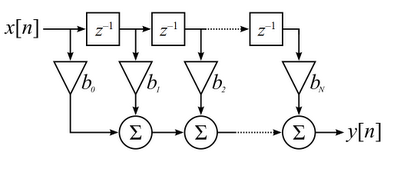

Recordemos que la relación de entrada salida de un sistema equivale a su función de transferencia, y teniendo en cuenta que una ecuación en diferencias puede ser expresada en terminos de a transformada Z, tenemos:

$y[n]=\sum_{i=1}^{N}w_ix[n-i]$

es equivalente a:

$Y[z]=\sum_{i=1}^Nb_iz^{-i}X[z]$

Por lo tanto:

$\frac{Y[z]}{X[z]}=\sum_{i=1}^Nb_iz^{-i}=H[z]$

De tal forma que la solución del sistema en el dominio de z, se resuelve por:

$Y[z]=H[z]X[z]$

Recordemos que un filtro en el dominio del tiempo se resuelve como una convolución de la señal con los coeficientes del filtro:

$y[n]=h[n]*x[n]$

vemos entonces que una convolución en el tiempo equivale a una multiplicación en z.:

En resumen podemos ver que la funcion de trasferencias esta dada por:

$H[z]=\frac{Y[z]}{X[z]}$

## Filtros IIR

Los filtros IIR presentan una respuesta infinita al impulso y la salida depende tanto de valores presentes y pasados de la entrada, como de valores pasados de la salida. Por lo anterior los filtros IIR son sistemas realimentados y por lo tanto es necesario evaluar su estabilidad (polos diferentes de cero).

La función de transferencia de un filtro IIR es de la siguiente forma:
\begin{equation}
H[z]=\frac{b_0+b_1z^{-1}+b_2z^{-2}+...+b_nz^{-n}}{1-a_1z^{-1}-a_2z^{-2}...-a_nz^{-n}}=\frac{\sum_{i=0}^{N}b_1z^{-i}}{1-\sum_{i=0}^{N}a_iz^{-1}}=\frac{Y[z]}{X[z]}
\end{equation}

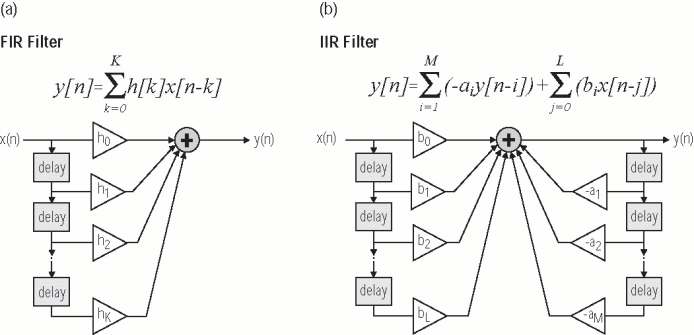

Para evaluar la estabilidad de los sitemas realimentados, es necesario revisar la teoria de la transformada Z.

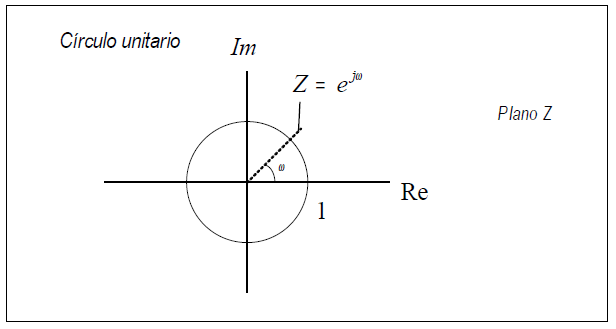

En un sistema es importante evaluar los ceros y los polos a partir de

---

la función de transferencia:

*   Ceros:  Las soluciones que hacen el numerador igual a cero
*   Polos: Las soluciones que hacen el denominador igual a cero.

En el plano z se puede determinar si un sistema es estable si los polos

están dentro del circulo unitario. Los ceros no tienen incidencia en la estabilidad, por lo tanto pueden estar ubicados en cualquier lugar del plano z.


## Ejercicio

Proponga una secuencia sinusoidal x_e (n), con 0≤n≤1000, F_0=0,01Hz y F_s=25Hz. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética x_e (n) a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:

y_e(n) = αx_e(n-D)+w(n)

Donde α representa la amplitud, D es un retraso debido a la conducción a través de los diversos tejidos y w(n)  representa el ruido generado por la electrónica de los sistemas de adquisición.

Genere las secuencias ficticias x_e (n) y y_e (n), implemente w(n)  como una secuencia de ruido Gaussiano con media cero y varianza σ^2=0,01, establezca α=0,8 y un retraso D=15 muestras. Grafique ambas señales.


In [ ]:
# importación de librerías
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from google.colab import drive

## Creación de la señal:

### Señal hipotética 𝑥𝑒(𝑛)

Text(0.5, 0, 'Tiempo (s)')

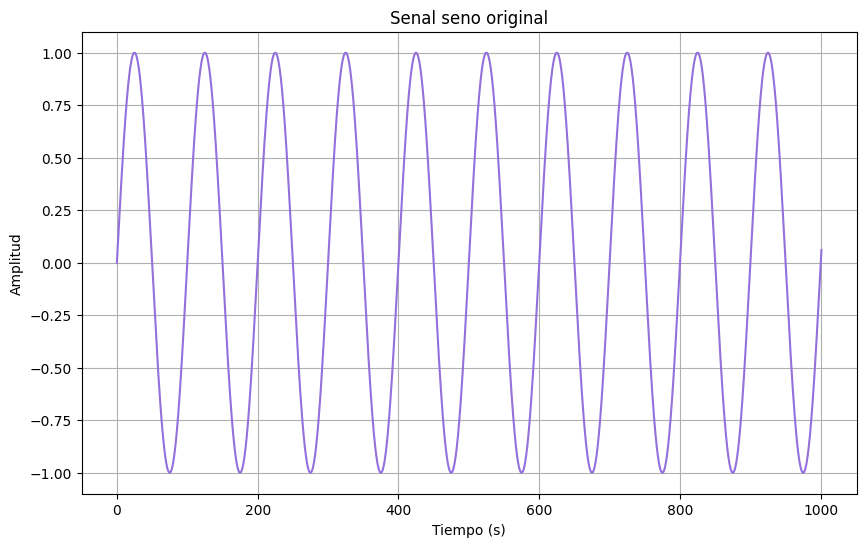

In [ ]:
Fs = 25
F0 = 0.01
t = np.arange(0,1001, 1/Fs)
xe = np.sin(2*np.pi*F0*t)

plt.figure(figsize=(10, 6))
plt.plot(t,xe,color="mediumpurple")
plt.grid(True)
plt.title("Senal seno original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

#### Creación de x_e, y_e, w_e

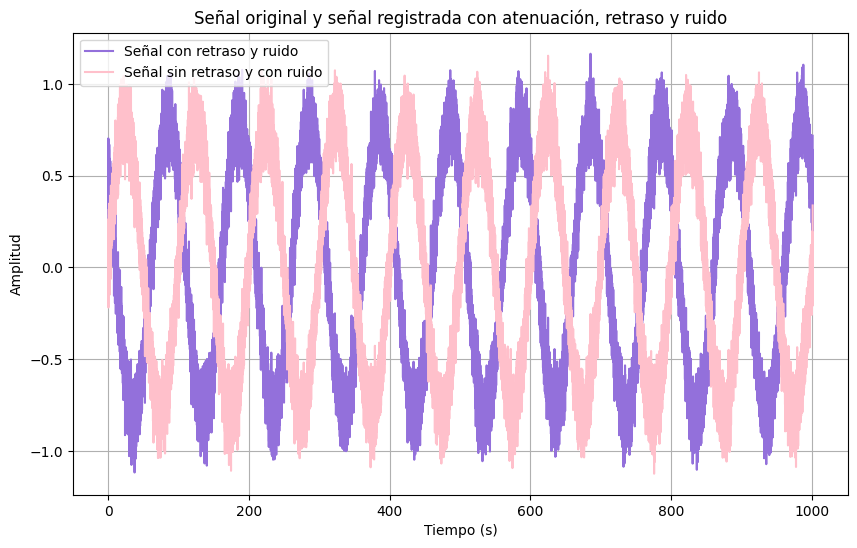

In [ ]:
# creación de x_e, y_e, w_e
alfa = 0.8 # atenuación
D = 15 # retrado inducido en la adquisición
var = 0.01 # varianza del ruido
media = 0 # media del ruido
n = np.arange(0,1001,1/Fs) # tiempo
x_e = np.sin(2*np.pi*F0*(n+15/Fs)+D) # potencial con retraso
x_e2 = np.sin(2*np.pi*F0*(n+15/Fs))
w = np.random.normal(media,np.sqrt(var),len(n)) # ruido gausiano
y_e = alfa*x_e + w # señal adquirida con ruido y retrado.
y_e2 = alfa*x_e2 + w # señal adquirida sin ruido

plt.figure(figsize=(10, 6))
plt.plot(n, y_e, color="mediumpurple", label="Señal con retraso y ruido")
plt.plot(n, y_e2, color="pink", label="Señal sin retraso y con ruido")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Señal original y señal registrada con atenuación, retraso y ruido")
plt.legend()
plt.grid(True)
plt.show()


La función firwin permite diseñar un filtro FIR utilizando el método de ventanas, donde los principales argumentos de entrada son

*   N: Orden del filtro
*   W_n: Frecuencia de corte.

Para filtros digitales W_n está normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la señal. W_n es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.

## Filtro FIR

#### Diseñe un filtro FIR pasa bajas para la señal y_e (n), con una frecuencia de corte de 1.25 muestras/s y orden 30.

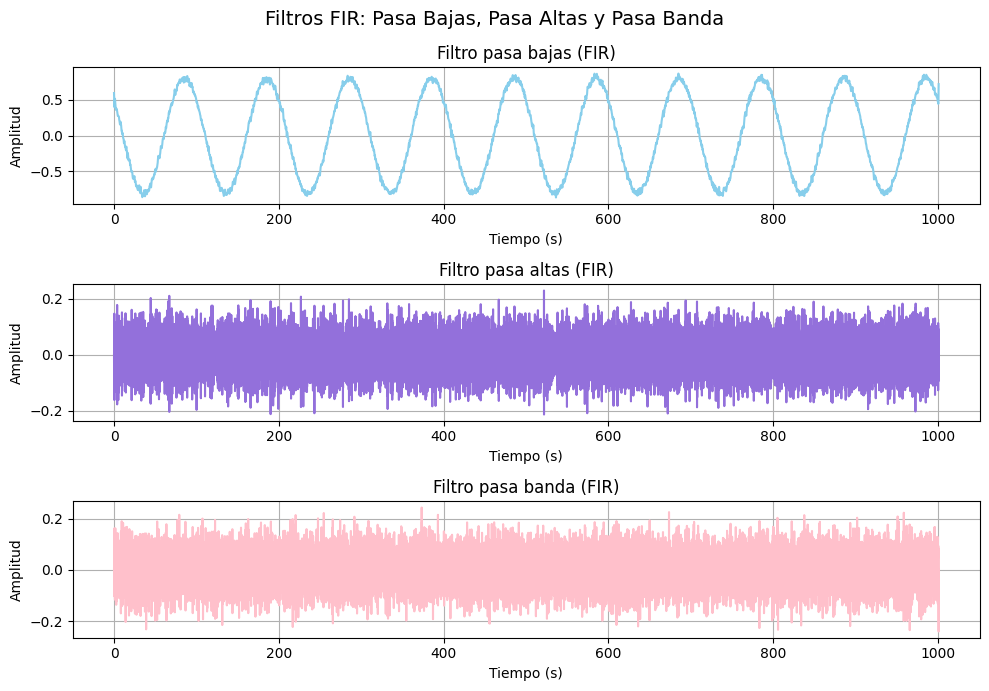

In [ ]:
order = 30 # orden según requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_high = 7.5/nyquist #frecuencia de corte normalizada
wn_low = 1.25/nyquist  # Frecuencia de corte normalizada


# Filtro pasa bajas
lowpass = signal.firwin(order+1,wn_low, pass_zero = 'lowpass',window='hamming')
y_f_30 = signal.filtfilt(b=lowpass,a=1,x=y_e)

# Filtro pasa altas
highpass = signal.firwin(order+1, wn_high, pass_zero='highpass', window='hamming')
y_f_high_30 = signal.filtfilt(b=highpass,a=1,x=y_e) # aplicación del filtro

# Filtro pasa banda
bandpass=signal.firwin(order+1,[wn_low,wn_high],pass_zero='bandpass',window='hamming')
y_f_band_30 = signal.filtfilt(b=bandpass,a=1,x=y_e) # aplicación del filtro

# Visualización de las señales filtradas
plt.figure(figsize=(10, 7))
plt.suptitle("Filtros FIR: Pasa Bajas, Pasa Altas y Pasa Banda", fontsize=14)

plt.subplot(3, 1, 1)
plt.plot(n, y_f_30, color='SKYblue')
plt.title("Filtro pasa bajas (FIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, y_f_high_30, color='mediumpurple')
plt.title("Filtro pasa altas (FIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(n, y_f_band_30, color='pink')
plt.title("Filtro pasa banda (FIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.tight_layout()
plt.show()

En la gráfica se observan tres señales que han sido filtradas mediante filtros FIR de diferentes tipos: pasa bajas, pasa altas y pasa banda. En el primer gráfico, correspondiente al filtro pasa bajas, se observa una señal senoidal suave, donde solo se conservan las frecuencias bajas, eliminando así componentes de alta frecuencia y ruido. En el segundo gráfico, asociado al filtro pasa altas, se evidencia una señal dominada por el ruido de alta frecuencia, lo cual es típico de este tipo de filtros, que eliminan las frecuencias bajas y permiten pasar solo las componentes de alta frecuencia. Finalmente, el tercer gráfico muestra el resultado del filtro pasa banda, donde se conservan únicamente las frecuencias entre los límites inferior y superior especificados; en este caso, se observa una mezcla de frecuencias bajas y altas, limitando el paso de frecuencias que se encuentran fuera del rango seleccionado. Estas gráficas demuestran cómo cada filtro FIR afecta el contenido frecuencial de la señal, permitiendo destacar o suprimir componentes específicas según el tipo de filtro aplicado.

## Filtro IIR

#### Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores

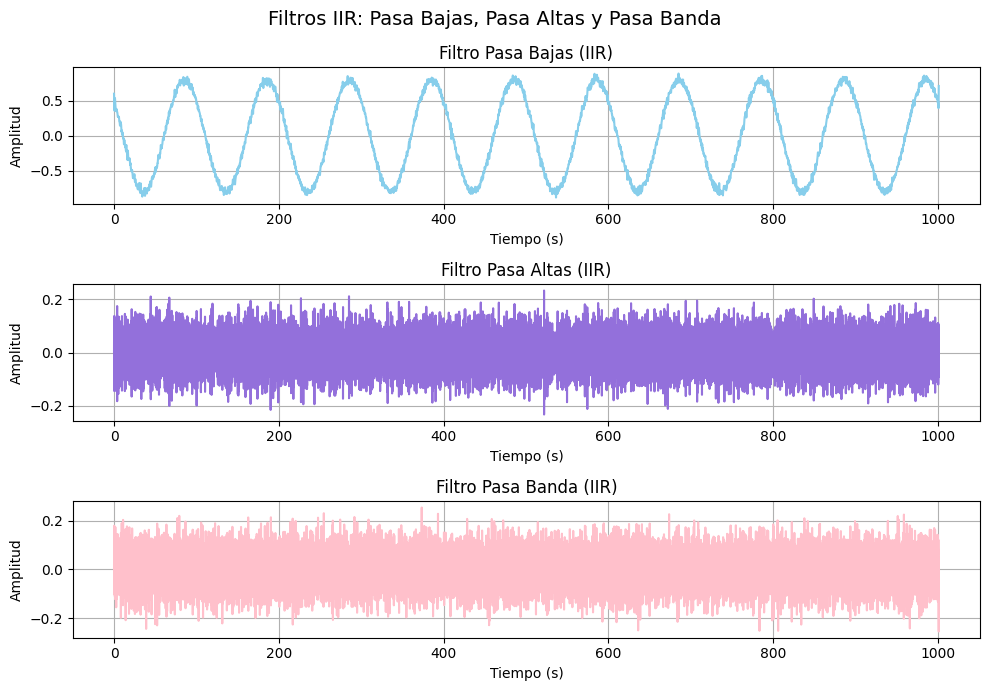

In [ ]:
order = 3 # orden según requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_high = 7.5/nyquist #frecuencia de corte normalizada
wn_low = 1.25/nyquist  # Frecuencia de corte normalizada

# Filtro pasa bajas
b_low, a_low = signal.iirfilter(order, wn_low, btype='lowpass')
y_f_low = signal.filtfilt(b=b_low,a=a_low,x=y_e)

# Filtro pasa altas
b_high, a_high = signal.iirfilter(order, wn_high, btype='highpass')
y_f_high = signal.filtfilt(b=b_high,a=a_high,x=y_e)

# Filtro pasa banda
b_band, a_band = signal.iirfilter(order, [wn_low,wn_high], btype='bandpass')
y_f_band = signal.filtfilt(b=b_band,a=a_band,x=y_e)

# Visualización de las señales
plt.figure(figsize=(10, 7))
plt.suptitle("Filtros IIR: Pasa Bajas, Pasa Altas y Pasa Banda", fontsize=14)

plt.subplot(3, 1, 1)
plt.plot(n, y_f_low, color='skyblue')
plt.title("Filtro Pasa Bajas (IIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, y_f_high, color='mediumpurple')
plt.title("Filtro Pasa Altas (IIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(n, y_f_band, color='pink')
plt.title("Filtro Pasa Banda (IIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.tight_layout()
plt.show()


En estos gráficos se presentan los resultados de aplicar filtros IIR (Infinite Impulse Response) de distintos tipos: pasa bajas, pasa altas y pasa banda. En el primer gráfico, correspondiente al filtro pasa bajas, se observa una señal senoidal suavizada, donde solo se conservan las frecuencias bajas, eliminando así las componentes de alta frecuencia y cualquier ruido asociado. En el segundo gráfico, que representa el filtro pasa altas, predominan las componentes de alta frecuencia, lo que refleja la eliminación de las frecuencias bajas y la preservación de las frecuencias altas en la señal. Por último, el tercer gráfico muestra el efecto de un filtro pasa banda, que permite el paso únicamente de las frecuencias comprendidas dentro de un rango específico; esto se traduce en una señal donde hay tanto frecuencias altas como bajas dentro de los límites del filtro. Comparado con los filtros FIR, los filtros IIR suelen ser más eficientes en términos de orden para obtener una respuesta similar, aunque pueden presentar una respuesta de fase no lineal. Estas gráficas ilustran claramente cómo los filtros IIR moldean el contenido frecuencial de la señal original según el tipo de filtro aplicado.

## Comparación IIR y FIR:

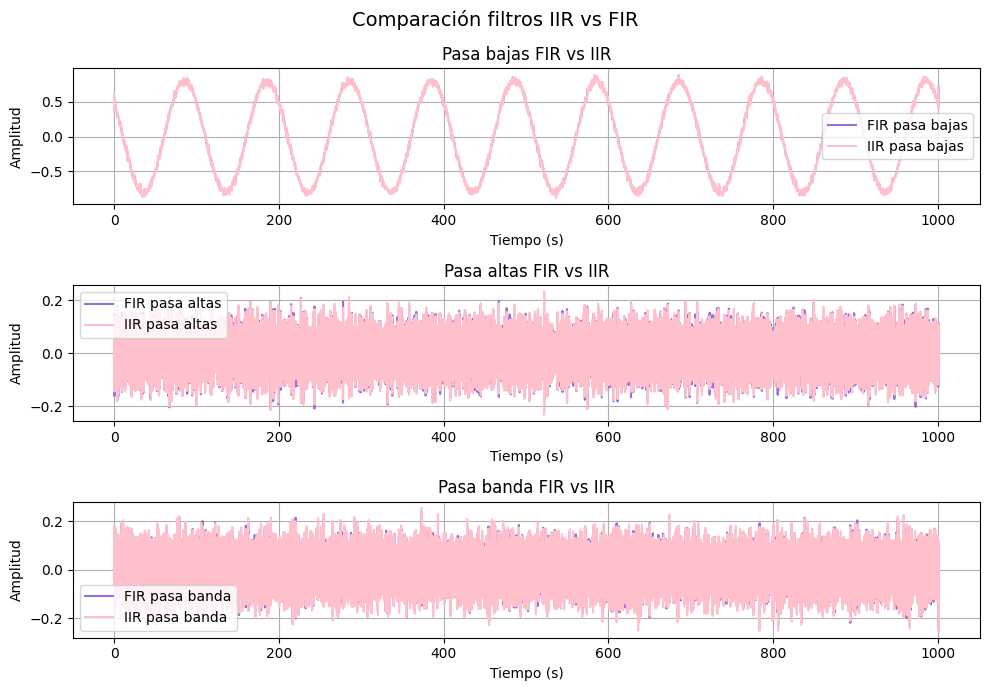

In [ ]:
# Visualización de las señales
plt.figure(figsize=(10, 7))
plt.suptitle("Comparación filtros IIR vs FIR", fontsize=14)

# Subplot 1: Pasa bajas FIR vs IIR
plt.subplot(3, 1, 1)
plt.plot(n, y_f_30, color="mediumpurple", label="FIR pasa bajas")
plt.plot(n, y_f_low, color="pink", label="IIR pasa bajas")
plt.title("Pasa bajas FIR vs IIR")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

# Subplot 2: Pasa altas FIR vs IIR
plt.subplot(3, 1, 2)
plt.plot(n, y_f_high_30, color="mediumpurple", label="FIR pasa altas")
plt.plot(n, y_f_high, color="pink", label="IIR pasa altas")
plt.title("Pasa altas FIR vs IIR")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

# Subplot 3: Pasa banda FIR vs IIR
plt.subplot(3, 1, 3)
plt.plot(n, y_f_band_30, color="mediumpurple", label="FIR pasa banda")
plt.plot(n, y_f_band, color="pink", label="IIR pasa banda")
plt.title("Pasa banda FIR vs IIR")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Al comparar los filtros FIR e IIR, se observa que ambos tienen un comportamiento muy similar. En el caso del filtro pasa bajas, ambos permiten el paso de las frecuencias bajas y logran atenuar efectivamente las altas sin distorsionar la forma de onda. Algo parecido ocurre con el filtro pasa altas, donde eliminan las frecuencias bajas y dejan pasar las altas. La diferencia entre el FIR y el IIR en filtros pasa altas puede notarse en detalles finos o en respuestas a cambios rápidos, donde el IIR podría responder más rápido, pero no de manera significativa. Con el filtro pasa bandas, los resultados también son prácticamente iguales para ambos tipos.

Los filtros IIR suelen generar un desfase ya que no siempre tienen una fase lineal. Sin embargo, en este caso, ambos filtros dieron resultados parecidos porque la frecuencia de corte es la misma y la señal tiene frecuencias bien definidas y estables. Esto permite que ambos enfoquen el mismo rango de frecuencias de interés, logrando una respuesta similar. Al seleccionar un orden adecuado para cada filtro, se pueden obtener resultados parecidos, aunque los FIR suelen necesitar un orden mayor. En este análisis, el filtro FIR se diseñó con un orden alto para que pudiera imitar la respuesta de un filtro IIR, minimizando así las diferencias entre ellos. Por eso, en aplicaciones de filtrado básico, los resultados de ambos filtros suelen ser casi indistinguibles.

## ¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas?

**Cambios en la función para filtros FIR**
1.   Filtro Pasa Altas:

*   Argumento cutoff: Para un filtro pasa altas, se usa una sola frecuencia de corte, en este caso, 7.5 muestras/s.
*   Argumento pass_zero: Debe configurarse como 'highpass'.

Ejemplo:
```
highpass = signal.firwin(order+1, wn_high, pass_zero='highpass', window='hamming')

```
1.   Filtro Pasa Banda:

*   Argumento cutoff: Se debe proporcionar un vector con las frecuencias de corte inferior y superior, por ejemplo, [1.25, 7.5] muestras/s.
*   Argumento pass_zero: Debe establecerse como 'bandpass'.
Ejemplo:

```
bandpass = signal.firwin(order+1, [wn_low, wn_high], pass_zero='bandpass', window='hamming')
```
**Cambios en la función para filtros IIR**
1.   Filtro Pasa Altas:

*   Argumento btype: Se debe cambiar a 'highpass'.

Ejemplo:
```
b_high, a_high = signal.iirfilter(order, wn_high, btype='highpass')
```
1.   Filtro Pasa Banda:

*   Argumento btype: Se debe ajustar a 'bandpass'.
*   Argumento de frecuencia de corte: Se pasa un vector con las frecuencias de corte inferior y superior, [wn_low, wn_high].
Ejemplo:


```
b_band, a_band = signal.iirfilter(order, [wn_low, wn_high], btype='bandpass')
```


## Función respuesta en frecuencia de un filtro digital

In [ ]:
def mfreqz(b,a,order,nyq_rate = 1):

    """
    Plot the impulse response of the filter in the frequency domain

    Parameters:

        b: numerator values of the transfer function (coefficients of the filter)
        a: denominator values of the transfer function (coefficients of the filter)

        order: order of the filter

        nyq_rate = nyquist frequency
    """

    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(8,10));
    plt.subplot(311);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();

    #plt.xlim((40,60))

    plt.grid(True);

    plt.subplot(312);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)


    plt.subplot(313);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.show()

## Respuesta en frecuencia del filtro FIR pasa bajas de orden 30

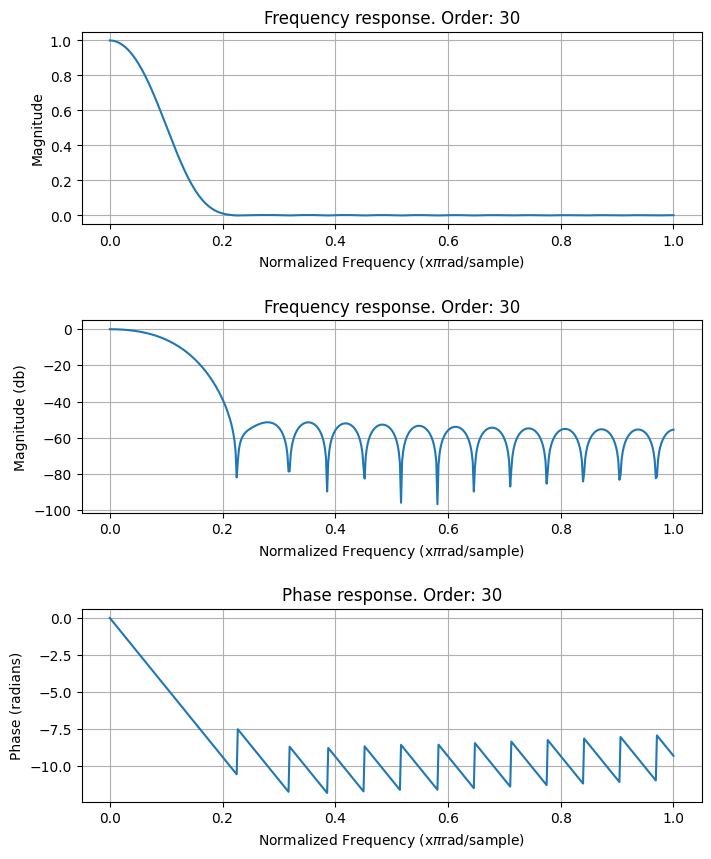

In [ ]:
mfreqz(b=lowpass,a=1,order=30)

1. Magnitud de la Respuesta en Frecuencia:

  El filtro permite el paso de frecuencias bajas y atenúa de manera efectiva las frecuencias altas, confirmando su funcionamiento como un filtro pasa bajas.

2. Magnitud en Decibeles (dB):

  La escala logarítmica facilita la visualización de la atenuación de frecuencias altas, mostrando una reducción rápida después de la frecuencia de corte. Esto cuantifica la eficacia del filtro al suprimir frecuencias no deseadas.

3. Respuesta en Fase:

  La fase lineal del filtro es consistente en frecuencias bajas, lo cual es ventajoso para aplicaciones que requieren una señal sin distorsiones de fase, característica típica de los filtros FIR.

## Respuesta en frecuencia de un filtro FIR pasa altas de orden 30

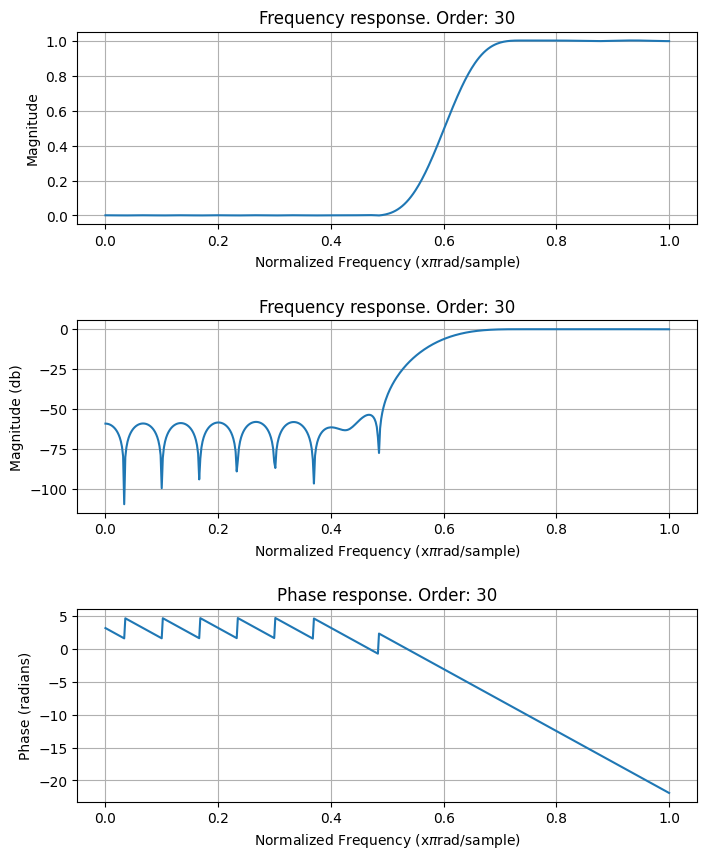

In [ ]:
mfreqz(b=highpass,a=1,order=30)

1. Magnitud de la Respuesta en Frecuencia:

  El filtro permite el paso de frecuencias altas y atenúa eficazmente las frecuencias bajas, confirmando su comportamiento como un filtro pasa altas.

2. Magnitud en Decibeles (dB):

  La escala logarítmica facilita la visualización de la atenuación de frecuencias bajas, mostrando una ganancia significativa en frecuencias superiores a la frecuencia de corte. Esto demuestra la efectividad del filtro en la amplificación de frecuencias altas.

3. Respuesta en Fase:

  La fase lineal del filtro es consistente en frecuencias altas, lo cual es ventajoso para aplicaciones que requieren preservar la forma de la señal sin distorsiones de fase, característica típica de los filtros FIR.

## Respuesta en frecuencia de un filtro FIR pasa banda de orden 30

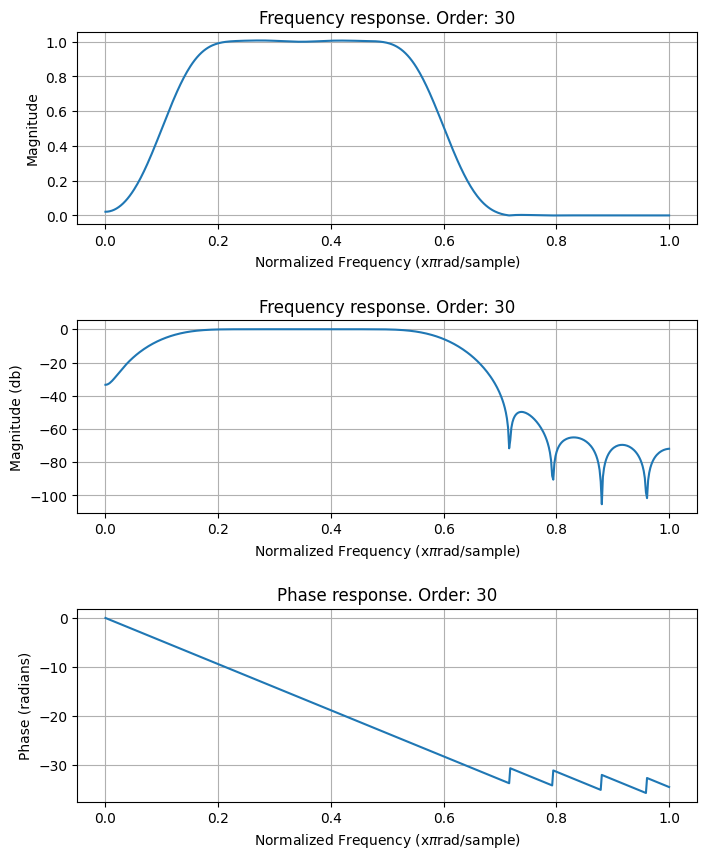

In [ ]:
mfreqz(b=bandpass,a=1,order=30)

1. Magnitud de la Respuesta en Frecuencia:

  El filtro permite el paso de un rango de frecuencias intermedias, mientras atenúa eficazmente las frecuencias bajas y altas, confirmando su funcionamiento como un filtro pasa banda.

2. Magnitud en Decibeles (dB):

  La escala logarítmica facilita la visualización de la atenuación tanto en frecuencias bajas como altas, mostrando una ganancia unitaria en la banda de paso. Esto demuestra la efectividad del filtro en suprimir frecuencias fuera del rango deseado.

3. Respuesta en Fase:
  
  La fase es lineal en la banda de paso, lo que es ventajoso para aplicaciones que requieren mantener la forma de la señal en las frecuencias intermedias, característica típica de los filtros FIR.

## Filtrado lfilter y filtfilt - FIR

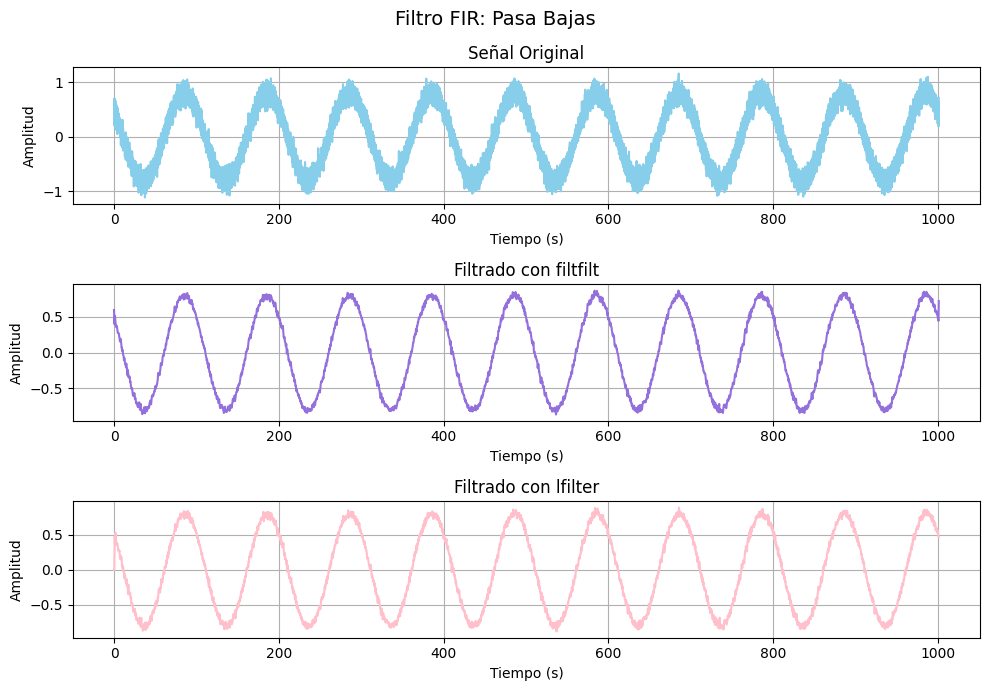

In [ ]:
y_lf_30 = signal.lfilter(b=lowpass, a=1, x=y_e)

# Gráfico comparativo en 3 subplots

plt.figure(figsize=(10, 7))
plt.suptitle("Filtro FIR: Pasa Bajas", fontsize=14)

# Subplot 1: Pasa bajas FIR vs IIR
plt.subplot(3, 1, 1)
plt.plot(n, y_e, color='skyblue')
plt.title("Señal Original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid(True)

# Subplot 2: Filtrado con filtfilt
plt.subplot(3, 1, 2)
plt.plot(n, y_f_30, label="Filtrado (filtfilt)", color="mediumpurple")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtrado con filtfilt")
plt.grid(True)

# Subplot 3: Filtrado con lfilter
plt.subplot(3, 1, 3)
plt.plot(n, y_lf_30, label="Filtrado (lfilter)", color="pink")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtrado con lfilter")
plt.grid(True)

# Ajustar espaciado
plt.tight_layout()
plt.show()


1. ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador?
   - En un filtro FIR (Finite Impulse Response), solo se utiliza el numerador porque estos filtros no tienen términos de realimentación, es decir, no tienen coeficientes en el denominador. El numerador hace referencia a los coeficientes del filtro, que determinan cómo se realiza la convolución con la señal de entrada para obtener la señal filtrada [2].

2. ¿Evidencia cambios en el uso de las funciones de filtrado?
   - No, las funciones `lfilter` y `filtfilt` producen resultados similares al aplicar el filtro FIR a la misma señal. Esto se podrías explicar porque en algunas señales y configuraciones de filtro, la diferencia entre ambos métodos puede no ser tan evidente en términos visuales, especialmente si el filtro no altera significativamente la fase o si la señal es simple y simétrica. Sin embargo, aunque los gráficos se vean similares, filtfilt usualmente preserva mejor la forma original de la señal en comparación con lfilter debido a la corrección de fase. Lo que normalmente sucede es que [3]:

     - `lfilter`: Filtra la señal en una sola dirección, lo que puede introducir un desfase en la señal resultante.
     - `filtfilt`: Aplica el filtro en ambas direcciones, lo que elimina el desfase y mejora la respuesta en fase, logrando un resultado más preciso.

3. ¿Cómo se puede explicar la falta de coincidencia?
   - La falta de coincidencia entre los resultados de `lfilter` y `filtfilt` se debe a que `lfilter` introduce un desfase en la señal, mientras que `filtfilt` lo elimina al filtrar en ambas direcciones. Esto es importante en aplicaciones donde se requiere preservar la forma de la señal sin distorsión de fase.

4. ¿Es adecuado el orden del filtro usado?
   - Sí, el orden de 30 es adecuado para el filtro FIR, ya que proporciona una transición suficientemente abrupta entre la banda de paso y la banda de atenuación, manteniendo una respuesta de fase lineal. Sin embargo, filtros de orden más bajo podrían usarse si se busca una implementación más rápida con una menor complejidad computacional, aunque con una atenuación menos efectiva en la banda de parada.

## Filtrado lfilter y filtfilt - IIR

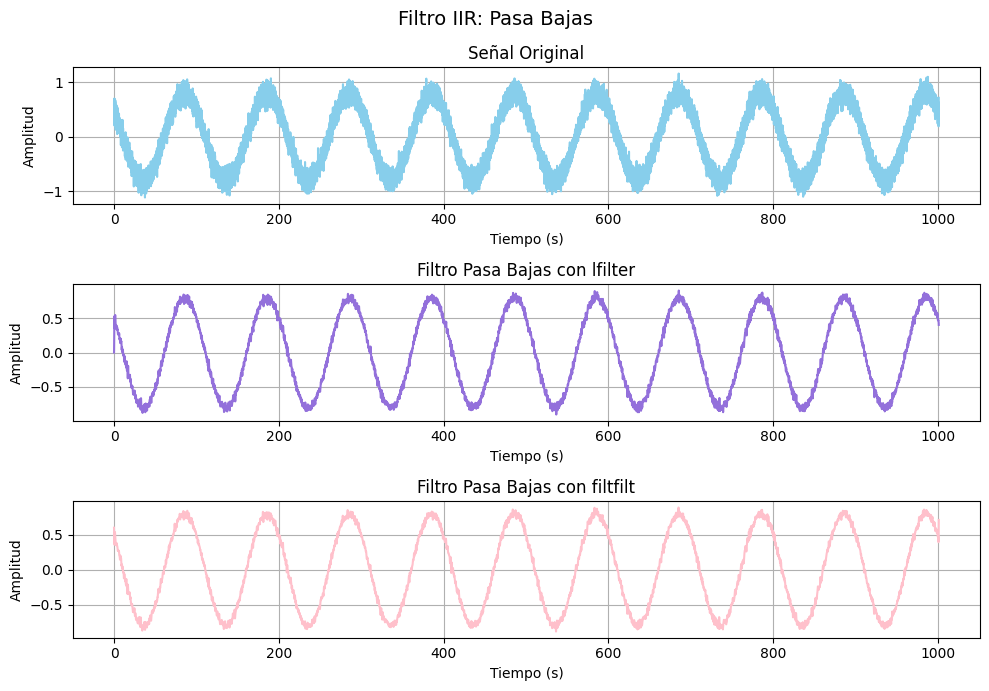

In [ ]:
y_f_lfilter = signal.lfilter(b=b_low,a=a_low,x=y_e)  # Usando lfilter

# Visualización de las señales filtradas
plt.figure(figsize=(10, 7))
plt.suptitle("Filtro IIR: Pasa Bajas", fontsize=14)

plt.subplot(3, 1, 1)
plt.plot(n, y_e, color='skyblue')
plt.title("Señal Original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, y_f_lfilter, color='mediumpurple')
plt.title("Filtro Pasa Bajas con lfilter")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(n, y_f_low, color='pink')
plt.title("Filtro Pasa Bajas con filtfilt")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.tight_layout()
plt.show()

1. ¿Por qué se utiliza el numerador y denominador?
   - En un filtro IIR (Infinite Impulse Response), se utilizan tanto el numerador como el denominador porque estos filtros incluyen términos de realimentación.
   - El numerador representa los coeficientes de la parte no recursiva del filtro (la parte que afecta directamente a la señal de entrada).
   - El denominador representa los coeficientes de la parte recursiva (la retroalimentación), que permite que la salida del filtro dependa de valores anteriores de la señal filtrada, lo que proporciona una respuesta más eficiente y más rápida a frecuencias específicas en comparación con los filtros FIR.

2. ¿Es necesario cambiar el orden del filtro?
   - Para filtros IIR, un orden más bajo suele ser adecuado, ya que estos filtros logran una transición más abrupta entre la banda de paso y la banda de atenuación, incluso con un orden más bajo, gracias a la realimentación.
   - En este caso, el filtro IIR de orden 3 es suficiente para proporcionar una buena atenuación en las frecuencias indeseadas y un paso adecuado en la banda de interés.
   - Aumentar el orden puede introducir inestabilidades y amplificación de ruido, por lo que generalmente no es recomendable en los filtros IIR a menos que sea estrictamente necesario para mejorar la selectividad del filtro.

#Aplicación:

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Bioseñales/P6/senal_filtros.txt'
data = np.loadtxt(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Periodograma de Welch

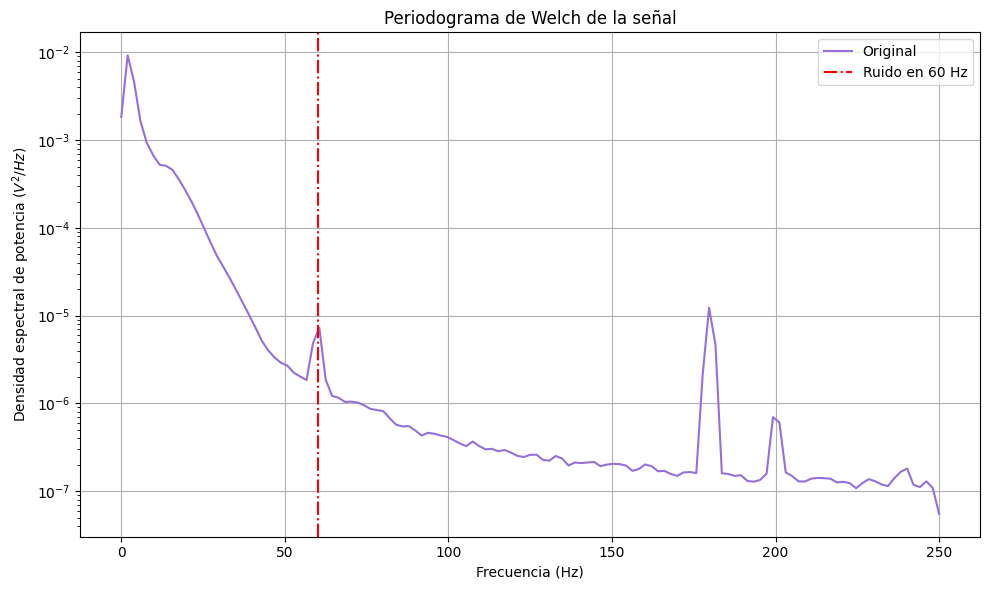

In [ ]:
canal = data[:, 0]
Fs = 500
frequencies, power_spectrum = signal.welch(canal, fs=Fs)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_spectrum, label='Original', color = "mediumpurple")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia $(V^2/Hz)$')
plt.title('Periodograma de Welch de la señal')
plt.axvline(x=60, color='red', linestyle='-.', label='Ruido en 60 Hz')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

El análisis del periodograma de Welch muestra la densidad espectral de potencia de la señal en función de la frecuencia. En la gráfica, se observa un pico claro en la densidad espectral en 60 Hz, lo que indica la presencia de ruido eléctrico asociado a la red eléctrica, típico en sistemas de 60 Hz. Este pico revela una componente significativa de ruido en la señal, lo cual es común en entornos donde las señales eléctricas pueden introducir interferencia no deseada [1].

En términos generales, el periodograma evidencia que la densidad espectral de potencia es más alta en las frecuencias bajas, lo cual es característico de señales que concentran más energía en estas componentes. A medida que la frecuencia aumenta, la densidad espectral disminuye, aunque se detectan algunos picos adicionales que corresponden a otras frecuencias relevantes dentro de la señal.

Para mitigar este ruido y mejorar la calidad de la señal, se podría considerar la aplicación de un filtro notch o un filtro pasa banda estrecho centrado en 60 Hz, lo que permitiría eliminar esta interferencia sin afectar significativamente otras componentes de la señal.

## Filtro FIR que permita eliminar el ruido

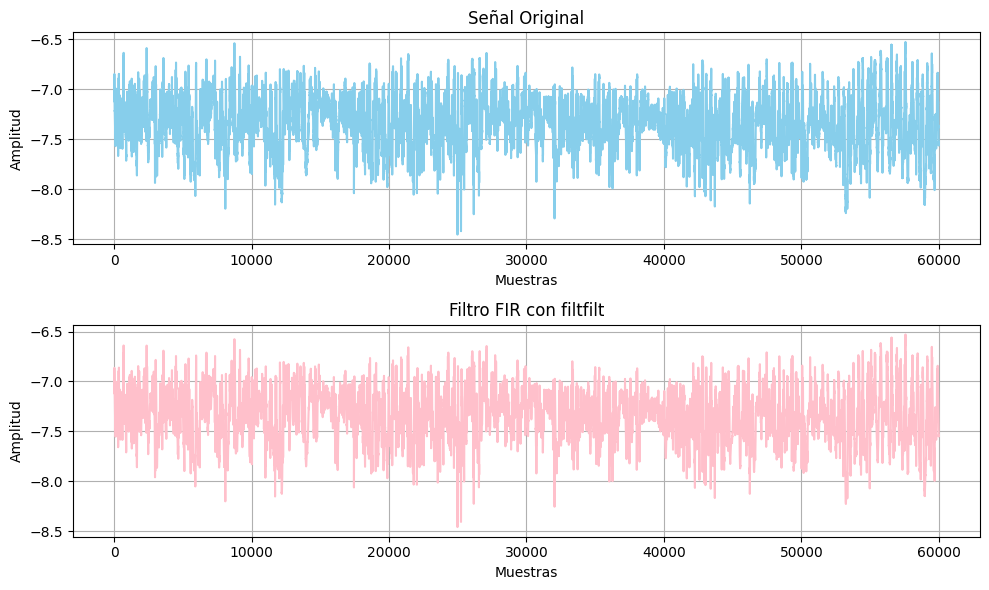

In [ ]:
# Diseño del filtro FIR
order = 30
nyquist = Fs/2 # frecuencia de nyquist
wn = 60/nyquist
b_fir = signal.firwin(order + 1, wn, window='hamming')

# Aplicar el filtro FIR a la señal
y_filtred = signal.filtfilt(b=b_fir, a=1, x=canal)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(canal, color='skyblue')
plt.title('Señal Original')
plt.ylabel('Amplitud')
plt.xlabel('Muestras')
plt.grid()
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(y_filtred, color='pink')
plt.title("Filtro FIR con filtfilt")
plt.ylabel("Amplitud")
plt.xlabel("Muestras")
plt.grid()
plt.tight_layout()

Los cambios no son muy evidentes a simple vista en la comparación directa de las señales. Para observar los cambios de manera más clara, sería necesario graficar el periodograma de Welch nuevamente. Este análisis espectral permitirá ver si el filtro ha reducido efectivamente la potencia en las frecuencias no deseadas, especialmente la componente de ruido en 60 Hz, y mostrar la mejora en la densidad espectral de potencia tras el filtrado.

## Comparación señal original vs filtrada - Periodograma welch

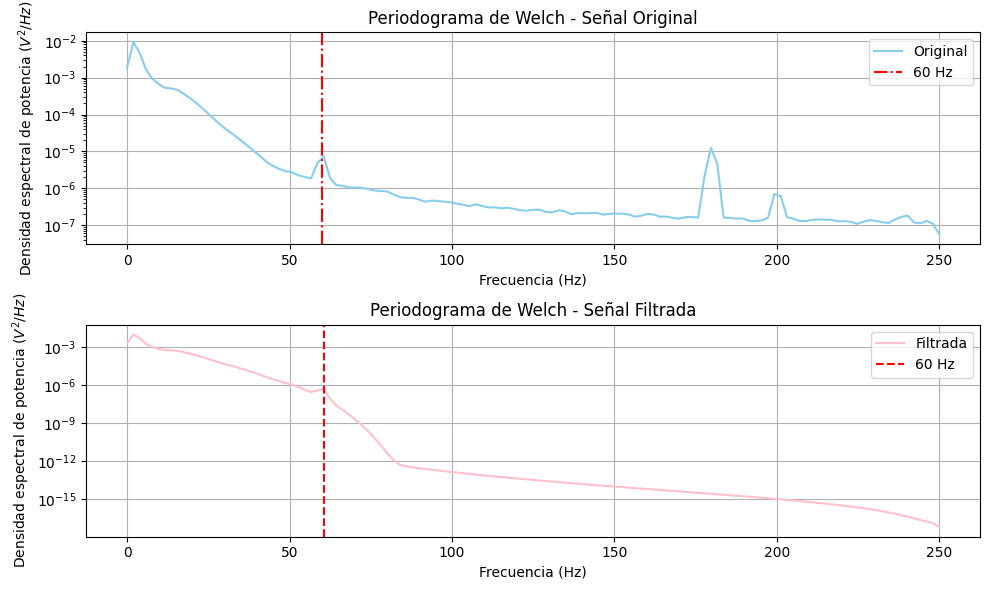

In [ ]:
b_fir = signal.firwin(order + 1, wn, window='hamming')
y_filtred = signal.filtfilt(b=b_fir, a=1, x=canal)
frequencies, power_spectrum_original = signal.welch(canal, fs=Fs)
frequencies_filtered, power_spectrum_filtered = signal.welch(y_filtred, fs=Fs)

plt.figure(figsize=(10, 6))

# Periodograma de la señal original
plt.subplot(2, 1, 1)
plt.semilogy(frequencies, power_spectrum_original, label='Original', color ="skyblue")
plt.axvline(x=60, color='red', linestyle='-.', label='60 Hz')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia $(V^2/Hz)$')
plt.title('Periodograma de Welch - Señal Original')
plt.legend()
plt.grid()

# Periodograma de la señal filtrada
plt.subplot(2, 1, 2)
plt.semilogy(frequencies_filtered, power_spectrum_filtered, label='Filtrada', color='pink')
plt.axvline(x=60.5, color='red', linestyle='--',label='60 Hz')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia $(V^2/Hz)$')
plt.title('Periodograma de Welch - Señal Filtrada')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Sí, hay cambios significativos tras aplicar el filtro FIR. En el periodograma de Welch de la señal filtrada, el pico a 60 Hz, que indicaba la presencia de ruido eléctrico, ha sido notablemente atenuado o eliminado. Esto demuestra que el filtro fue eficaz en suprimirse la interferencia a esa frecuencia específica. Adicionalmente, la densidad espectral de potencia general disminuye considerablemente, lo que indica una reducción del ruido en la señal filtrada, confirmando la mejora en su limpieza espectral.

In [ ]:
#Tamaño de canal_1
print("Tamaño del canal 1:", canal.shape)

Tamaño del canal 1: (60000,)


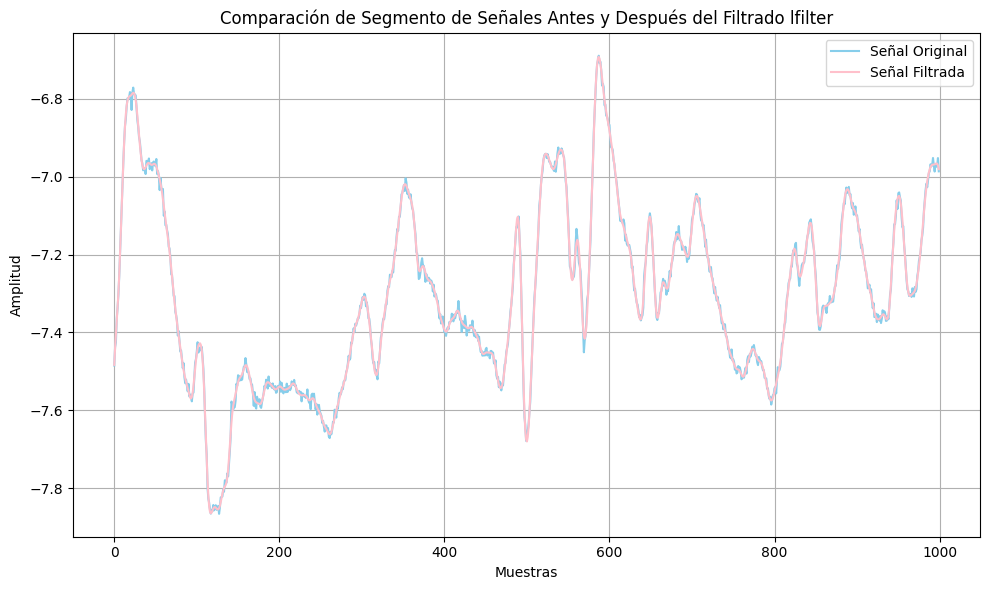

In [ ]:
# Segmento de la señal
start = 3000
end = 4000
segment_original = canal[start:end]
segment_filtrado = y_filtred[start:end]

# Graficar el segmento de las señales
plt.figure(figsize=(10, 6))
plt.plot(segment_original, color='skyblue', label='Señal Original')
plt.plot(segment_filtrado, color='pink', label='Señal Filtrada')
plt.title('Comparación de Segmento de Señales Antes y Después del Filtrado lfilter')
plt.ylabel('Amplitud')
plt.xlabel('Muestras')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

El gráfico muestra un segmento de las señales antes y después del filtrado con el filtro FIR, lo que permite observar los cambios en la amplitud después del proceso de filtrado. Aunque la forma de la señal se conserva, se evidencia una ligera reducción en la amplitud de la señal filtrada, lo que indica la eliminación de ciertas componentes de ruido, especialmente la de 60 Hz, preservando las características principales de la señal original. Esto confirma la eficacia del filtro FIR en la reducción del ruido, manteniendo la integridad de la señal.

## Referencias

[1] John G. Webster, Medical Instrumentation: Application and Design, 4th ed., Wiley, 2009.

[2] Proakis, J. G., & Manolakis, D. G. (2006). "Digital Signal Processing: Principles, Algorithms, and Applications."

[3] DSP Stack Exchange. “Applying Filter in Scipy Signal: Use lfilter or filtfilt?” Stack Exchange, 2014. [Online]. Available: https://dsp.stackexchange.com/questions/19084/applying-filter-in-scipy-signal-use-lfilter-or-filtfilt. [Accessed: 31-Oct-2024].